# Downloading and Prepping Data

### Let's first import all the libraries

Import primary modules

In [1]:
import itertools
import pandas as pd
import numpy as np

Import visualization modules

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import pandas.plotting

mpl.style.use('ggplot') # optional: for ggplot-like style

### Load Data From IBM Cloud Storage

In [3]:
#Let's load the dataset
df = pd.read_csv('Data-Collisions.csv')
df.head(2)

C:\Users\Tolu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


The dataset contains 37 attributes and a categorical target variable. Not all of these attributes will be relevant in predicting the severity of an accident. First we will remove all descriptive columns that wil not contibute to the model. Next, we will remove columns that have a high percentage of missing values. lastly, we will remove. All other features which only become apparent AFTER the accident has occured such as person and vehicle counts are excluded from the analysis.

## Exploratory Data Analysis & Data Cleaning

Here, we will summarize the main characteristics of the data to gain better understanding and uncover relationships between important variables. The goal of this excercise is to identify and extract the variables that have the most impact on predicting the severity of an accident. First, let's find out how many enteries are in our dataset

In [4]:
df.shape

(194673, 38)

In [5]:
#Let's see how many of each class is in the target variable
pd.DataFrame(df.SEVERITYCODE.value_counts())

,SEVERITYCODE
1,136485
2,58188


Text(0.5, 1.0, 'Severity Code')

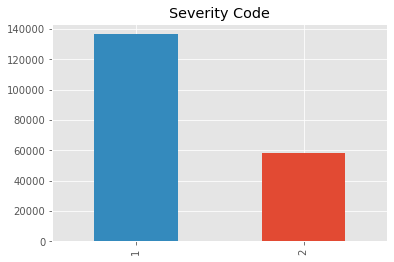

In [6]:
df.SEVERITYCODE.value_counts().plot(kind='bar', color=['C1', 'C0']); plt.title('Severity Code')

In [7]:
#Let's see what percentage of each class is in the target variable
pd.DataFrame(df.SEVERITYCODE.value_counts(normalize=True) * 100)

,SEVERITYCODE
1,70.109877
2,29.890123


This is a binary classification problem since we have just 2 classes in our target variable. 70% of the accidents' severity are classified as property damage while 30% as injury. This indicates an inbalanced dataset. we have to balance the dataset in order to avoid building a biased machine learning model. But before then, we have identify and select the most important attributes and address the missing values in these attributes before modeling.

### Remove Redundant Features

Since the objective is to predict the severity of an accident based on road and weather conditions, for initial feature selection, I decided to drop all other atrtibutes except for 'WEATHER' & 'ROADCOND'. I also included 'X' & 'Y' coordiantes of the accident for spatial visualization purposes.

In [8]:
df2=df[['INCDATE','WEATHER','ROADCOND','X', 'Y','SEVERITYCODE']]
df2.head()

,INCDATE,WEATHER,ROADCOND,X,Y,SEVERITYCODE
0,2013/03/27 00:00:00+00,Overcast,Wet,-122.323148,47.703140,2
1,2006/12/20 00:00:00+00,Raining,Wet,-122.347294,47.647172,1
2,2004/11/18 00:00:00+00,Overcast,Dry,-122.334540,47.607871,1
3,2013/03/29 00:00:00+00,Clear,Dry,-122.334803,47.604803,1
4,2004/01/28 00:00:00+00,Raining,Wet,-122.306426,47.545739,2


### Missing Values Resolution

First, let's see how many missing values are in the dataset

In [9]:
pd.DataFrame(df2.isnull().sum(axis = 0))

,0
INCDATE,0
WEATHER,5081
ROADCOND,5012
X,5334
Y,5334
SEVERITYCODE,0


Now, let's see what percentage this translates to.

In [10]:
pd.DataFrame(df2.isnull().sum(axis = 0) / len(df2) * 100)

,0
INCDATE,0.000000
WEATHER,2.610018
ROADCOND,2.574574
X,2.739979
Y,2.739979
SEVERITYCODE,0.000000


In [11]:
df3=df2.dropna(how = 'any')
df3.shape

(184367, 6)

In order to simplify the missing values resolution process, I decided to remove all the rows with missing values. Thus, about 10,000 rows with null values were removed from the dataset. This represents about 5% of the original dataset.

In [12]:
#Let's make sure there are no more missing values
pd.DataFrame(df3.isnull().sum(axis = 0))

,0
INCDATE,0
WEATHER,0
ROADCOND,0
X,0
Y,0
SEVERITYCODE,0


In [13]:
#Let's see how many of each class is in the target variable after dropping all the null values
pd.DataFrame(df3.SEVERITYCODE.value_counts())

,SEVERITYCODE
1,128314
2,56053


In [14]:
#Let's see what percentage of each class is in the target variable after dropping all the null values
pd.DataFrame(df3.SEVERITYCODE.value_counts(normalize=True) * 100)

,SEVERITYCODE
1,69.597054
2,30.402946


After removing rows with null values, I verified that the shape of the original dataset hasn't been significantly altered. The balance of the target variable of the resulting dataset matched that of the original dataset - 70% classified as 1- property damage and 30% classified as 2 - injury.

## Data visualization and pre-processing

In [15]:
# Install seaborn
# !conda install -c anaconda seaborn -y

In [16]:
pd.DataFrame(df3.WEATHER.value_counts(normalize=True) * 100)

,WEATHER
Clear,59.088666
Raining,17.362652
Overcast,14.712503
Unknown,7.530089
Snowing,0.484902
Other,0.418188
Fog/Smog/Smoke,0.299945
Sleet/Hail/Freezing Rain,0.060748
Blowing Sand/Dirt,0.026577
Severe Crosswind,0.013018


The proportion of various weather conditions show that 60% of accidents recorded occurred in clear weather, 17% when it's raining and 15% when the weather is overcast.

In [17]:
byweather = df3.groupby("WEATHER").SEVERITYCODE.value_counts(normalize=True)
byweather.unstack()

SEVERITYCODE,1,2
WEATHER,,
Blowing Sand/Dirt,0.734694,0.265306
Clear,0.676014,0.323986
Fog/Smog/Smoke,0.667269,0.332731
Other,0.857328,0.142672
Overcast,0.682691,0.317309
Partly Cloudy,0.400000,0.600000
Raining,0.660679,0.339321
Severe Crosswind,0.708333,0.291667
Sleet/Hail/Freezing Rain,0.758929,0.241071


Text(0.5, 1.0, 'Severity by Weather Conditions')

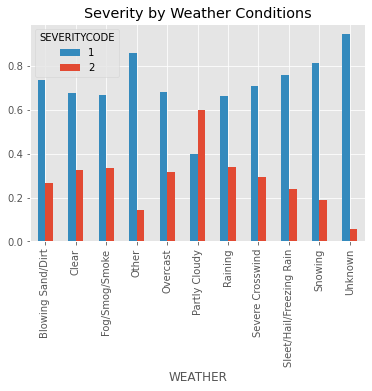

In [18]:
byweather.unstack().plot(kind='bar', color=['C1', 'C0']); plt.title('Severity by Weather Conditions')

By breaking down the proportion of weather contitions by severity, it shows that accidents that occur when the weather is partly cloudy lead to bodily harm 60% of the time.

In [19]:
pd.DataFrame(df3.ROADCOND.value_counts(normalize=True) *100)

,ROADCOND
Dry,66.172363
Wet,24.973016
Unknown,7.500800
Ice,0.636773
Snow/Slush,0.535345
Other,0.063460
Standing Water,0.055324
Sand/Mud/Dirt,0.034171
Oil,0.028747


The proportion of various road conditions show that 66% of the accidents occur when the road conditions are dry, 25% when it's wet and other road conditions like ice, snow/slush and oil account for the remaining 9% of accidents recorded.

In [20]:
byroadcond = df3.groupby("ROADCOND").SEVERITYCODE.value_counts(normalize=True)
byroadcond.unstack()

SEVERITYCODE,1,2
ROADCOND,,
Dry,0.676803,0.323197
Ice,0.773424,0.226576
Oil,0.622642,0.377358
Other,0.666667,0.333333
Sand/Mud/Dirt,0.650794,0.349206
Snow/Slush,0.832827,0.167173
Standing Water,0.745098,0.254902
Unknown,0.948369,0.051631
Wet,0.666153,0.333847


Text(0.5, 1.0, 'Severity by Road Conditions')

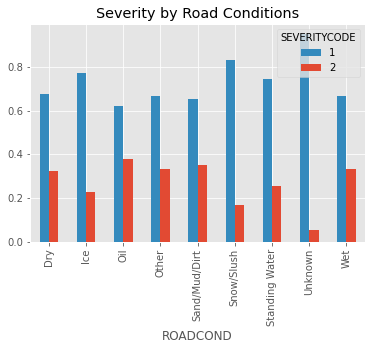

In [21]:
byroadcond.unstack().plot(kind='bar', color=['C1', 'C0']); plt.title('Severity by Road Conditions')

By breaking down the proportion of road contitions by severity, it shows that accidents recorded when the road conditions are oily lead to injury 38% of the time.

Text(0.5, 1.0, 'Road Conditions')

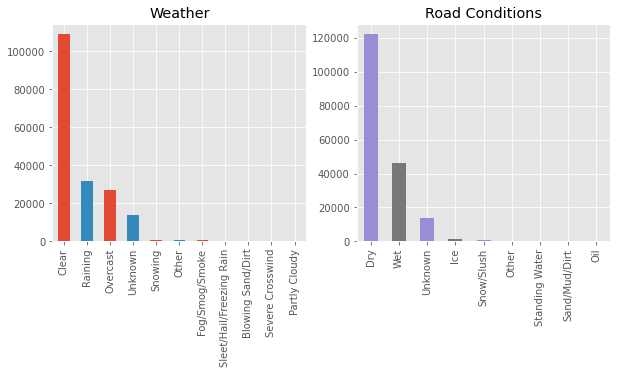

In [22]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);df3.WEATHER.value_counts().plot(kind='bar', color=['C0', 'C1']); plt.title('Weather')
plt.subplot(1,2,2);df3.ROADCOND.value_counts().plot(kind='bar', color=['C2', 'C3']); plt.title('Road Conditions')

In [23]:
df3.shape

(184367, 6)

In [24]:
df_test = df3[['WEATHER','ROADCOND', 'SEVERITYCODE']]
df_grp = df_test.groupby(['WEATHER','ROADCOND'], as_index=False).mean()

In [25]:
df_grp_pivot = df_grp.pivot(index='ROADCOND', columns='WEATHER')
df_grp_pivot

SEVERITYCODE                                               \
WEATHER        Blowing Sand/Dirt     Clear Fog/Smog/Smoke     Other  Overcast   
ROADCOND                                                                        
Dry                         1.25  1.325039       1.341880  1.304094  1.320073   
Ice                         1.00  1.263242       1.393939  1.263158  1.210762   
Oil                          NaN  1.625000            NaN  1.000000  1.375000   
Other                       2.00  1.400000       1.000000  1.285714  1.333333   
Sand/Mud/Dirt                NaN  1.481481       1.500000  1.000000  1.266667   
Snow/Slush                  1.20  1.236559       1.000000  1.000000  1.138462   
Standing Water               NaN  1.200000            NaN       NaN  1.571429   
Unknown                     1.00  1.118644       1.285714  1.061630  1.141141   
Wet                         1.50  1.329730       1.307692  1.327869  1.323007   

                                                         \
WEATHER        Partly Cloudy   Raining Severe Crosswind   
ROADCOND                                                  
Dry                      1.5  1.314050         1.333333   
Ice                      NaN  1.428571         1.333333   
Oil                      NaN  1.280000              NaN   
Other                    NaN  1.500000              NaN   
Sand/Mud/Dirt            NaN  1.300000              NaN   
Snow/Slush               NaN  1.252747              NaN   
Standing Water           NaN  1.262500              NaN   
Unknown                  NaN  1.176471              NaN   
Wet                      2.0  1.340429         1.250000   

                                                             
WEATHER        Sleet/Hail/Freezing Rain   Snowing   Unknown  
ROADCOND                                                     
Dry                            1.400000  1.333333  1.151478  
Ice                            1.166667  1.138554  1.057971  
Oil                                 NaN       NaN  1.000000  
Other                          1.000000  2.000000  1.000000  
Sand/Mud/Dirt                       NaN  1.000000  1.166667  
Snow/Slush                     1.259259  1.164510  1.055556  
Standing Water                 1.000000       NaN  1.000000  
Unknown                             NaN  1.125000  1.045786  
Wet                            1.267857  1.302632  1.177184

<function matplotlib.pyplot.show(*args, **kw)>

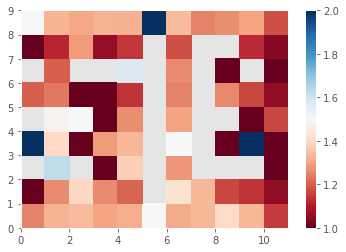

In [26]:
plt.pcolor(df_grp_pivot, cmap='RdBu')
plt.colorbar()
plt.show

### Convert Categorical Features to Numeric Values

I used one hot encoding to convert categorical variables to binary variables and append them to the feature Data Frame

In [27]:
Feature = df3[['WEATHER','ROADCOND']]
Feature = pd.concat([Feature,pd.get_dummies(df3['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df3['ROADCOND'])], axis=1)
Feature.drop(['WEATHER','ROADCOND','Other','Unknown'], axis = 1,inplace=True)
Feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [28]:
Feature.shape

(184367, 16)

### Feature selection

In [29]:
X = Feature
X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [30]:
y = df3['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [31]:
np.count_nonzero(y==1)

128314

In [32]:
np.count_nonzero(y==2)

56053

### Train_Test_Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147493, 16) (147493,)
Test set: (36874, 16) (36874,)


### Normalize Data

In [34]:
from sklearn import preprocessing
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

### Principal Component Analysis

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(.95)

In [37]:
pca.fit(X_train)

PCA(n_components=0.95)

In [38]:
# Find out how many components PCA chose
pca.n_components_

13

In [39]:
pca.explained_variance_ratio_

array([0.19331699, 0.10148489, 0.07908855, 0.06613331, 0.06435231,
       0.06296969, 0.06254838, 0.06251467, 0.06250266, 0.0621442 ,
       0.06097296, 0.05971111, 0.0250744 ])

Together, the 13 components account for 95% of the variance in the dataset.

In [40]:
#Transform both taining and test set
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [41]:
print ('Train set after PCA:', X_train.shape,  y_train.shape)
print ('Test set after PCA:', X_test.shape,  y_test.shape)

Train set after PCA: (147493, 13) (147493,)
Test set after PCA: (36874, 13) (36874,)


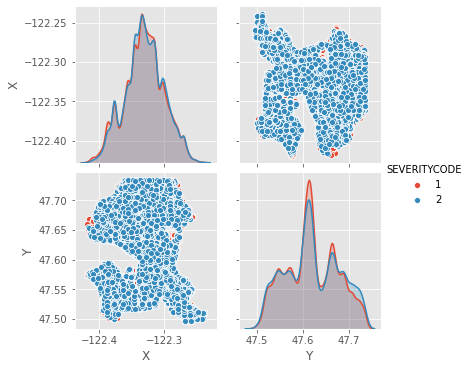

In [42]:
import seaborn as sns
sns.pairplot(df3,hue='SEVERITYCODE')

## Model Building

In [43]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)

#### Evaluate Decision Tree Model

In [46]:
#print("The Jaccard Index is:",jaccard_similarity_score(y_test, predTree))
print("The F1-Score is:",f1_score(y_test, predTree, average='weighted'))

The F1-Score is: 0.5648402540510872


In [47]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           1       0.69      1.00      0.82     25483
           2       0.00      0.00      0.00     11391

    accuracy                           0.69     36874
   macro avg       0.35      0.50      0.41     36874
weighted avg       0.48      0.69      0.56     36874



C:\Users\Tolu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine

In [48]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhatSVM = clf.predict(X_test)

#### Evaluate SVM Tree Model

In [49]:
#print("The Jaccard Index is:",jaccard_similarity_score(y_test, yhatSVM))
print("The F1-Score is:",f1_score(y_test, yhatSVM, average='weighted'))

The F1-Score is: 0.5648402540510872


In [50]:
print (classification_report(y_test, yhatSVM))

              precision    recall  f1-score   support

           1       0.69      1.00      0.82     25483
           2       0.00      0.00      0.00     11391

    accuracy                           0.69     36874
   macro avg       0.35      0.50      0.41     36874
weighted avg       0.48      0.69      0.56     36874



C:\Users\Tolu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [52]:
yhatLR = LR.predict(X_test)

In [53]:
yhat_prob = LR.predict_proba(X_test)

#### Evaluate LR Model

In [54]:
#print("The Jaccard Index is:",jaccard_similarity_score(y_test, yhatLR))
print("The F1-Score is:",f1_score(y_test, yhatLR, average='weighted'))

The F1-Score is: 0.5648402540510872


In [55]:
print (classification_report(y_test, yhatLR))

              precision    recall  f1-score   support

           1       0.69      1.00      0.82     25483
           2       0.00      0.00      0.00     11391

    accuracy                           0.69     36874
   macro avg       0.35      0.50      0.41     36874
weighted avg       0.48      0.69      0.56     36874



C:\Users\Tolu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Building Using Balanced Dataset

It is important to balance the dataset so the the machine learning algorithm is not biased. In order to balcnce the dataset, I decided to use the over-sampling techique.

#### Over-sampling technique

In [56]:
!pip install imblearn

In [57]:
from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(ratio='minority')
#Xsm, ysm = smote.fit_sample(X, y)
smk = SMOTETomek(random_state=42)
Xsm, ysm = smk.fit_sample(X, y)

Now, let's chek out the shape of our balanced dataset

In [58]:
Xsm.shape,ysm.shape

((256628, 16), (256628,))

In [59]:
np.count_nonzero(ysm==1)

128314

In [60]:
np.count_nonzero(ysm==2)

128314

#### Train-Test Split Balanced Dataset

In [61]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split( Xsm, ysm, test_size=0.2, random_state=4)
print ('Balanced Train set:', Xsm_train.shape,  ysm_train.shape)
print ('Balanced Test set:', Xsm_test.shape,  ysm_test.shape)

Balanced Train set: (205302, 16) (205302,)
Balanced Test set: (51326, 16) (51326,)


#### Standardize Balanced Dataset

In [62]:
Xsm_train= preprocessing.StandardScaler().fit(Xsm_train).transform(Xsm_train)
Xsm_test= preprocessing.StandardScaler().fit(Xsm_test).transform(Xsm_test)

#### Principal Component Analysis of Balanced Dataset

In [63]:
pca.fit(Xsm_train)

PCA(n_components=0.95)

In [64]:
# Find out how many components PCA chose
pca.n_components_

13

In [65]:
pca.explained_variance_ratio_

array([0.19669533, 0.09155284, 0.07964358, 0.0668299 , 0.06381017,
       0.06254067, 0.06250389, 0.0625021 , 0.0625019 , 0.06248533,
       0.0612806 , 0.05917145, 0.03349017])

In [66]:
#Transform both taining and test set
Xsm_train = pca.transform(Xsm_train)
Xsm_test = pca.transform(Xsm_test)

In [67]:
print ('Balanced Train set after PCA:', Xsm_train.shape,  ysm_train.shape)
print ('Balanced Test set after PCA:', Xsm_test.shape,  ysm_test.shape)

Balanced Train set after PCA: (205302, 13) (205302,)
Balanced Test set after PCA: (51326, 13) (51326,)


### Decision Tree

In [68]:
Tree_sm = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree_sm.fit(Xsm_train,ysm_train)
predTree_sm = Tree_sm.predict(Xsm_test)

#### Evaluate Decision Tree Model (Balanced dataset)

In [69]:
#print("The Jaccard Index is:",jaccard_similarity_score(ysm_test, predTree_sm))
print("The F1-Score is:",f1_score(ysm_test, predTree_sm, average='weighted'))

The F1-Score is: 0.45832908770802516


In [70]:
print (classification_report(ysm_test, predTree_sm))

              precision    recall  f1-score   support

           1       0.51      0.83      0.63     25606
           2       0.54      0.20      0.29     25720

    accuracy                           0.51     51326
   macro avg       0.52      0.51      0.46     51326
weighted avg       0.52      0.51      0.46     51326



### Support Vector Machine

In [71]:
from sklearn import svm
clf_sm = svm.SVC(kernel='rbf')
clf_sm.fit(Xsm_train, ysm_train)
yhatSVM_sm = clf_sm.predict(Xsm_test)

#### Evaluate SVM Model

In [72]:
#print("The Jaccard Index is:",jaccard_similarity_score(ysm_test, yhatSVM_sm))
print("The F1-Score is:",f1_score(ysm_test, yhatSVM_sm, average='weighted'))

The F1-Score is: 0.44515524055679667


In [73]:
print (classification_report(ysm_test, yhatSVM_sm))

              precision    recall  f1-score   support

           1       0.85      0.12      0.20     25606
           2       0.53      0.98      0.68     25720

    accuracy                           0.55     51326
   macro avg       0.69      0.55      0.44     51326
weighted avg       0.69      0.55      0.45     51326



### Logistic Regression (Balanced Dataset)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_sm = LogisticRegression(C=0.01, solver='liblinear').fit(Xsm_train,ysm_train)
LR_sm

LogisticRegression(C=0.01, solver='liblinear')

In [75]:
yhatLR_sm = LR_sm.predict(Xsm_test)
yhat_sm_prob = LR_sm.predict_proba(Xsm_test)

#### Evaluate LR Model (Balanced Dataset)

In [76]:
#print("The Jaccard Index is:",jaccard_similarity_score(ysm_test, yhatLR_sm))
print("The F1-Score is:",f1_score(ysm_test, yhatLR_sm, average='weighted'))

The F1-Score is: 0.505771662889569


In [77]:
print (classification_report(ysm_test, yhatLR_sm))

              precision    recall  f1-score   support

           1       0.60      0.27      0.37     25606
           2       0.53      0.82      0.64     25720

    accuracy                           0.54     51326
   macro avg       0.56      0.54      0.51     51326
weighted avg       0.56      0.54      0.51     51326

